In [ ]:
#OK

In [1]:
using Plots
using DifferentialEquations
using JuliaMBD
using JuliaMBD.Diagram

In [2]:
@model pitch_rate_vl begin
    @parameter begin
        I_center2Fr_ENG_mount = 1.1374
        I_center2Rr_ENG_mount = 0.90993
        I_center2Fr_Chair = 0.34122
        I_center2Rr_Chair = -1.0237
        I_center2Rr_sus = -1.4976
        I_center2Fr_sus = 1.1374
        i_center_gravity = 400
    end
    @xmlmodel("METI_Vertical_Vibration.drawio", "pitch_rate_vl") 
end

pitch_rate_vl (generic function with 1 method)

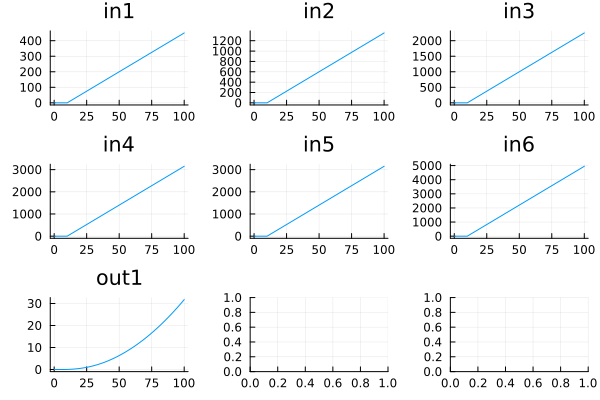

In [4]:
@model TestPitch_rate_vl begin


    @block begin
        p = pitch_rate_vl()
        ramp1 = Ramp(starttime=10, slope=5)
        ramp2 = Ramp(starttime=10, slope=15)
        ramp3 = Ramp(starttime=10, slope=25)
        ramp4 = Ramp(starttime=10, slope=35)
        ramp5 = Ramp(starttime=10, slope=45)
        ramp6 = Ramp(starttime=10, slope=55)
    end
    @connect begin
        ramp1.out => p.F_ENG_MNT_F2VL_N
        ramp2.out => p.F_ENG_MNT_R2VL_N
        ramp3.out => p.F_ST_F2VL_N
        ramp4.out => p.F_ST_R2VL_N
        ramp5.out => p.F_SUS_R2VL_N
        ramp6.out => p.F_SUS_F2VL_N
    end
    @scope begin
        p.F_ENG_MNT_F2VL_N => in1
        p.F_ENG_MNT_R2VL_N => in2
        p.F_ST_F2VL_N => in3
        p.F_ST_R2VL_N => in4
        p.F_ST_R2VL_N => in5
        p.F_SUS_F2VL_N => in6
        p.omg_VL_pitch_rate_radps => out1
    end
end
m = @compile TestPitch_rate_vl()
res = simulate(m, tspan=[0, 100])
plot(res, layout=(3,3))

In [5]:
@model v_z_carbody_vl begin
    @parameter begin
        g=9.8
        M_car_body=1171.2
    end
    @xmlmodel("METI_Vertical_Vibration.drawio", "v_z_carbody_vl") 
end

v_z_carbody_vl (generic function with 1 method)

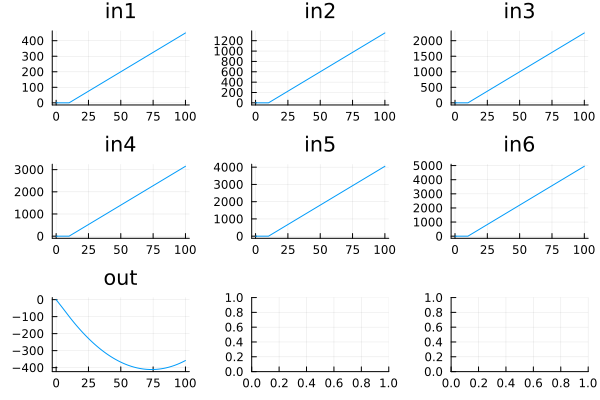

In [7]:
@model TestV_z_carbody_vl begin


    @block begin
        p = v_z_carbody_vl()
        ramp1 = Ramp(starttime=10, slope=5)
        ramp2 = Ramp(starttime=10, slope=15)
        ramp3 = Ramp(starttime=10, slope=25)
        ramp4 = Ramp(starttime=10, slope=35)
        ramp5 = Ramp(starttime=10, slope=45)
        ramp6 = Ramp(starttime=10, slope=55)
    end
    @connect begin
        ramp1.out => p.F_ENG_MNT_F2VL_N
        ramp2.out => p.F_ENG_MNT_R2VL_N
        ramp3.out => p.F_ST_F2VL_N
        ramp4.out => p.F_ST_R2VL_N
        ramp5.out => p.F_Rr_sus
        ramp6.out => p.F_Fr_sus
    end
    @scope begin
        p.F_ENG_MNT_F2VL_N => in1
        p.F_ENG_MNT_R2VL_N => in2
        p.F_ST_F2VL_N => in3
        p.F_ST_R2VL_N => in4
        p.F_Rr_sus => in5
        p.F_Fr_sus => in6
        p.v_VL_mps => out
    end
end
m = @compile TestV_z_carbody_vl()
res = simulate(m, tspan=[0, 100])
plot(res, layout=(3,3))

In [13]:
@model z_velocity_vl begin
    @parameter begin
        I_center2Fr_ENG_mount = 1.1374
        I_center2Rr_ENG_mount = 0.90993
        I_center2Fr_Chair = 0.34122
        I_center2Rr_Chair = -1.0237
        I_center2Rr_sus = -1.4976
        I_center2Fr_sus = 1.1374
    end
    @xmlmodel("METI_Vertical_Vibration.drawio", "z_velocity_vl") 
end

z_velocity_vl (generic function with 1 method)

In [15]:
@model TestZ_velocity_vl begin


    @block begin
        p = z_velocity_vl()
        ramp1 = Ramp(starttime=10, slope=5)
        ramp2 = Ramp(starttime=10, slope=15)
        
    end
    @connect begin
        ramp1.out => p.v_VL_mps
        ramp2.out => p.omg_VL_pitch_rate_radps
        
    end
    @scope begin
        p.v_VL_mps => in1
        p.omg_VL_pitch_rate_radps => in2
        
        p.v_VL2ENG_MNT_F_mps => out1
        p.v_VL2ENG_MNT_R_mps => out2
        p.v_VL2ST_F_mps => out3
        p.v_VL2ST_R_mps => out4
        p.v_VL2SUS_R_mps => out5
        p.v_VL2SUS_F_mps => out6
    end
end
m = @compile TestZ_velocity_vl()
res = simulate(m, tspan=[0, 100])
plot(res, layout=(3,2))

TypeError: TypeError: in keyword argument signs, expected AbstractString, got a value of type Vector{Symbol}

In [44]:
@buildxml "vl" pitch_rate_vl v_z_carbody_vl z_velocity_vl

12188

In [51]:
@model VL_PNT begin
    @xmlmodel("METI_Vertical_Vibration.drawio", "VL_PNT")
end

VL_PNT (generic function with 1 method)

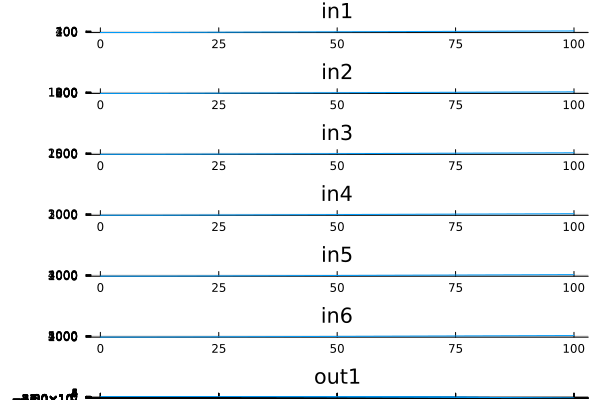

GKS: Viewport is not within the NDC unit square in routine SET_VIEWPORT
GKS: Viewport is not within the NDC unit square in routine SET_VIEWPORT
GKS: Viewport is not within the NDC unit square in routine SET_VIEWPORT
GKS: Viewport is not within the NDC unit square in routine SET_VIEWPORT
GKS: Viewport is not within the NDC unit square in routine SET_VIEWPORT
GKS: Viewport is not within the NDC unit square in routine SET_VIEWPORT
GKS: Viewport is not within the NDC unit square in routine SET_VIEWPORT
GKS: Viewport is not within the NDC unit square in routine SET_VIEWPORT
GKS: Viewport is not within the NDC unit square in routine SET_VIEWPORT
GKS: Viewport is not within the NDC unit square in routine SET_VIEWPORT
GKS: Viewport is not within the NDC unit square in routine SET_VIEWPORT
GKS: Viewport is not within the NDC unit square in routine SET_VIEWPORT
GKS: Viewport is not within the NDC unit square in routine SET_VIEWPORT
GKS: Viewport is not within the NDC unit square in routine SET_V

In [52]:
@model TestVL_PNT begin
    @block begin
        m = VL_PNT()
        ramp1 = Ramp(starttime=10, slope=5)
        ramp2 = Ramp(starttime=10, slope=15)
        ramp3 = Ramp(starttime=10, slope=25)
        ramp4 = Ramp(starttime=10, slope=35)
        ramp5 = Ramp(starttime=10, slope=45)
        ramp6 = Ramp(starttime=10, slope=55)
    end
    @connect begin
        ramp1.out => m.F_ENG_MNT_F2VL_N
        ramp2.out => m.F_ENG_MNT_R2VL_N
        ramp3.out => m.F_ST_F2VL_N
        ramp4.out => m.F_ST_R2VL_N
        ramp5.out => m.F_SUS_R2VL_N
        ramp6.out => m.F_SUS_F2VL_N
    end
    @scope begin
        m.F_ENG_MNT_F2VL_N => in1
        m.F_ENG_MNT_R2VL_N => in2
        m.F_ST_F2VL_N => in3
        m.F_ST_R2VL_N => in4
        m.F_SUS_R2VL_N => in5
        m.F_SUS_F2VL_N => in6
        m.v_VL2ENG_MNT_F_mps => out1
        m.v_VL2ENG_MNT_R_mps => out2
        m.v_VL2ST_F_mps => out3
        m.v_VL2ST_R_mps => out4
        m.v_VL2SUS_R_mps => out5
        m.v_VL2SUS_F_mps => out6
    end
end

m = @compile TestVL_PNT()
res = simulate(m, tspan=[0, 100])
plot(res, layout=(3,3))